In [0]:
import tensorflow
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from __future__ import print_function
import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import cv2
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = []
X_test = []
for i in range(len(x_train)):
  X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
  X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = numpy.asarray(X_train) 
X_test = numpy.asarray(X_test)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
__________

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(rotation_range = 40) #applying random rotations to the data set

In [0]:
validation_generator = ImageDataGenerator()

In [0]:
validation_generator.fit(x_test)

datagen.fit(x_train)

In [23]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch = len(x_train) / 32, epochs = 5, validation_data = validation_generator.flow(x_test, y_test, batch_size = 32),validation_steps = 1000)


Epoch 1/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.8379 - acc: 0.7005 - val_loss: 0.1132 - val_acc: 0.9651
Epoch 2/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1005 - acc: 0.9700 - val_loss: 0.0748 - val_acc: 0.9763
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0720 - acc: 0.9785 - val_loss: 0.0472 - val_acc: 0.9858
Epoch 4/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 5/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0477 - acc: 0.9861 - val_loss: 0.0321 - val_acc: 0.9906


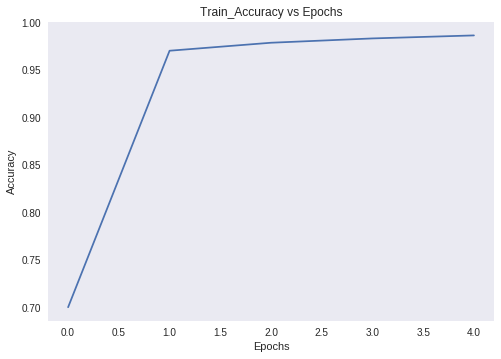

In [24]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Train_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

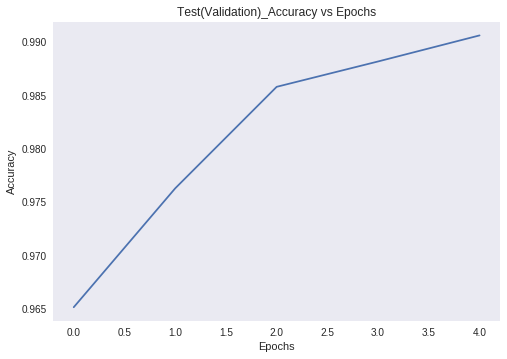

In [25]:
plt.plot(history.history['val_acc'])
plt.title('Test(Validation)_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

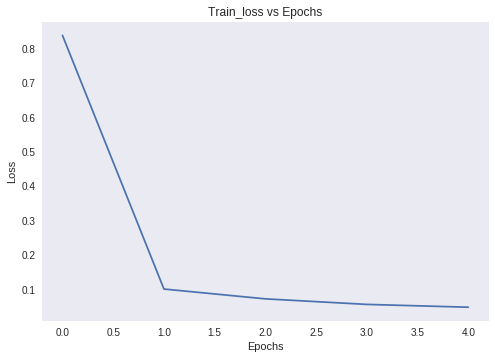

In [26]:
plt.plot(history.history['loss'])
plt.title('Train_loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

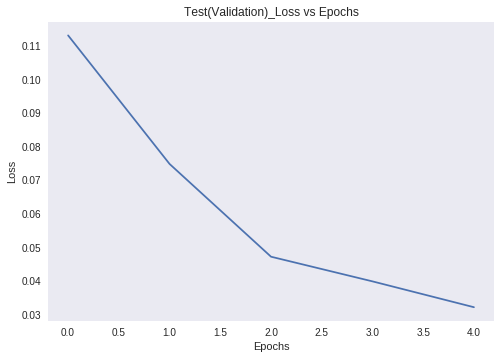

In [27]:
plt.plot(history.history['val_loss'])
plt.title('Test(Validation)_Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [28]:
s_loss = []
s_acc = []
for j in range(-45,50,5):
  rotate_test_x = []
  for i in range(len(X_test)):
    X_test_rotate = Image.fromarray(X_test[i])
    new_image = X_test_rotate.rotate(j)
    img_array = numpy.array(new_image)
    rotate_test_x.append(img_array)
  X_test_rotate = numpy.asarray(rotate_test_x)
  X_test_rotate = X_test_rotate.reshape(X_test_rotate.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_rotate, y_test, batch_size=32)
  print("Rotation degree: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 4s 395us/step
Rotation degree: -45 Score:[0.6708947430133841, 0.9578]
10000/10000 [==============================] - 4s 381us/step
Rotation degree: -40 Score:[0.42005940365791994, 0.9737]
10000/10000 [==============================] - 4s 380us/step
Rotation degree: -35 Score:[0.28725108520687465, 0.9817]
10000/10000 [==============================] - 4s 384us/step
Rotation degree: -30 Score:[0.23969086404441478, 0.9849]
10000/10000 [==============================] - 4s 380us/step
Rotation degree: -25 Score:[0.208757014851282, 0.987]
10000/10000 [==============================] - 4s 382us/step
Rotation degree: -20 Score:[0.19374479918574064, 0.9878]
10000/10000 [==============================] - 4s 385us/step
Rotation degree: -15 Score:[0.2094399516776467, 0.9866]
10000/10000 [==============================] - 4s 384us/step
Rotation degree: -10 Score:[0.21994463266357114, 0.9861]
10000/10000 [==============================] - 4s 381us/step


In [29]:
s_loss

[0.6708947430133841,
 0.42005940365791994,
 0.28725108520687465,
 0.23969086404441478,
 0.208757014851282,
 0.19374479918574064,
 0.2094399516776467,
 0.21994463266357114,
 0.22984542411128422,
 0.1743536612887455,
 0.2615081715133654,
 0.21820959478021715,
 0.1969586051166155,
 0.22820646737330572,
 0.23869694012984702,
 0.2911111881519574,
 0.3645175949275337,
 0.5063861561462402,
 0.7404538876952609]

In [30]:
s_acc

[0.9578,
 0.9737,
 0.9817,
 0.9849,
 0.987,
 0.9878,
 0.9866,
 0.9861,
 0.9856,
 0.989,
 0.9832,
 0.9858,
 0.9876,
 0.9854,
 0.9847,
 0.9817,
 0.9772,
 0.9681,
 0.953]

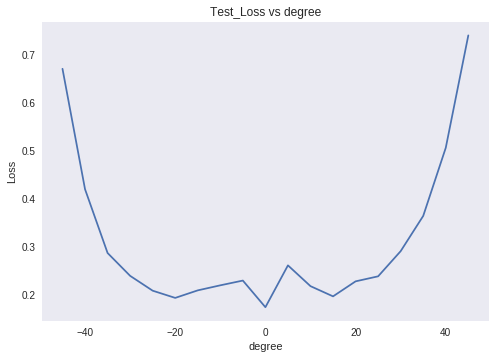

In [31]:
plt.plot( range(-45,50,5), s_loss)
plt.title('Test_Loss vs degree')
plt.ylabel('Loss')
plt.xlabel('degree')
plt.grid()
plt.show()

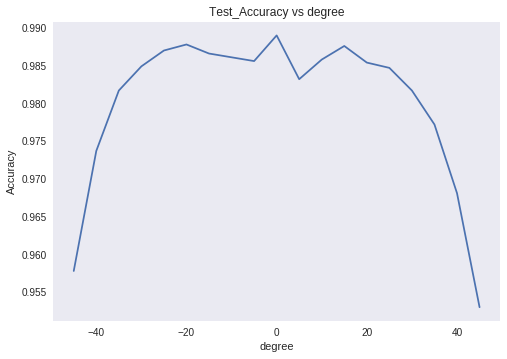

In [32]:
plt.plot( range(-45,50,5), s_acc)
plt.title('Test_Accuracy vs degree')
plt.ylabel('Accuracy')
plt.xlabel('degree')
plt.grid()
plt.show()

In [33]:
from PIL import ImageFilter
s_loss = []
s_acc = []
for j in range(0,7):
  filter_test_x = []
  for i in range(len(X_test)):
    X_test_filter = Image.fromarray(X_test[i])
    new_image = X_test_filter.filter(ImageFilter.GaussianBlur(radius=j))
    img_array = numpy.array(new_image)
    filter_test_x.append(img_array)
  X_test_filter = numpy.asarray(filter_test_x)
  X_test_filter = X_test_filter.reshape(X_test_filter.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_filter, y_test, batch_size=32)
  print("Filter radius: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])
  #We can see accuracy doesnt improve in this case as the data augmentation was done only for rotations 

10000/10000 [==============================] - 4s 406us/step
Filter radius: 0 Score:[0.1743536612887455, 0.989]
10000/10000 [==============================] - 4s 382us/step
Filter radius: 1 Score:[0.17037417346491332, 0.989]
10000/10000 [==============================] - 4s 379us/step
Filter radius: 2 Score:[0.665875063097405, 0.9559]
10000/10000 [==============================] - 4s 380us/step
Filter radius: 3 Score:[3.5227216413497926, 0.7512]
10000/10000 [==============================] - 4s 380us/step
Filter radius: 4 Score:[6.652305493927002, 0.4918]
10000/10000 [==============================] - 4s 384us/step
Filter radius: 5 Score:[7.920265014648438, 0.3377]
10000/10000 [==============================] - 4s 384us/step
Filter radius: 6 Score:[8.107508961486817, 0.2369]


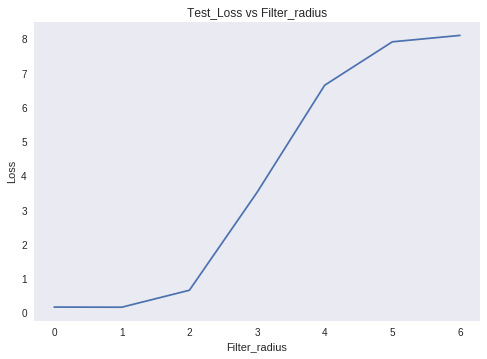

In [34]:
plt.plot( range(0,7), s_loss)
plt.title('Test_Loss vs Filter_radius')
plt.ylabel('Loss')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()

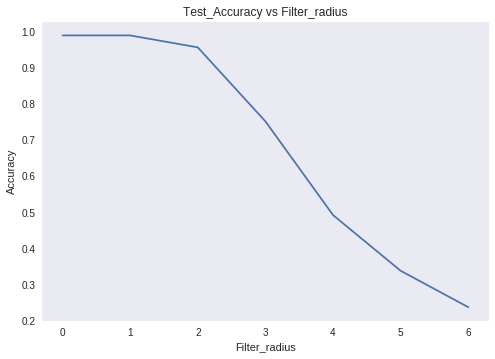

In [35]:
plt.plot( range(0,7), s_acc)
plt.title('Test_Accuracy vs Filter_radius')
plt.ylabel('Accuracy')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()